In [6]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [7]:
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):    
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

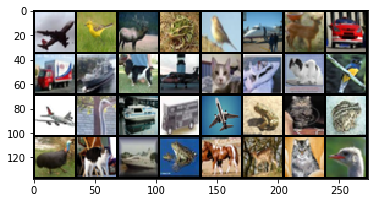

In [5]:
imshow(torchvision.utils.make_grid(images))

In [8]:
import torch.nn as nn
import torch.nn.functional as F

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1) # 3x32x32 -> 16x32x32        
        self.pool = nn.MaxPool2d(2, 2) # 16x32x32 -> 16x16x16
        
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1) # 32x16x16 -> 32x16x16        
        self.pool2 = nn.MaxPool2d(2, 2) # 16x32x32 -> 32x16x16
        
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1) # 32x8x8 -> 64x8x8            
        self.pool3 = nn.MaxPool2d(2, 2) # 64x8x8  -> 64x4x4 
        
        self.fc1 = nn.Linear(64 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))        
        x = self.pool(x)
        
        x = F.relu(self.conv2(x))        
        x = self.pool2(x)
        
        x = F.relu(self.conv3(x))        
        x = self.pool3(x)
        
        x = x.view(-1, 64 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = Net().to(device)

In [10]:
from torchsummary import summary
import numpy as np
summary(net, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
         MaxPool2d-2           [-1, 16, 16, 16]               0
            Conv2d-3           [-1, 32, 16, 16]           4,640
         MaxPool2d-4             [-1, 32, 8, 8]               0
            Conv2d-5             [-1, 64, 8, 8]          18,496
         MaxPool2d-6             [-1, 64, 4, 4]               0
            Linear-7                  [-1, 256]         262,400
            Linear-8                  [-1, 128]          32,896
            Linear-9                   [-1, 10]           1,290
Total params: 320,170
Trainable params: 320,170
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.28
Params size (MB): 1.22
Estimated Total Size (MB): 1.51
-------------------------------------------

In [37]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [38]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, (data, target) in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data.to(device), target.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 0:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 500))
            running_loss = 0.0

print('Finished Training')

[1,     1] loss: 0.004
[1,   501] loss: 1.884
[1,  1001] loss: 1.636
[1,  1501] loss: 1.479
[2,     1] loss: 0.002
[2,   501] loss: 1.347
[2,  1001] loss: 1.275
[2,  1501] loss: 1.229
[3,     1] loss: 0.002
[3,   501] loss: 1.099
[3,  1001] loss: 1.083
[3,  1501] loss: 1.040
[4,     1] loss: 0.003
[4,   501] loss: 0.936
[4,  1001] loss: 0.950
[4,  1501] loss: 0.927
[5,     1] loss: 0.002
[5,   501] loss: 0.827
[5,  1001] loss: 0.825
[5,  1501] loss: 0.827
[6,     1] loss: 0.002
[6,   501] loss: 0.729
[6,  1001] loss: 0.750
[6,  1501] loss: 0.762
[7,     1] loss: 0.001
[7,   501] loss: 0.633
[7,  1001] loss: 0.675
[7,  1501] loss: 0.676
[8,     1] loss: 0.001
[8,   501] loss: 0.562
[8,  1001] loss: 0.587
[8,  1501] loss: 0.614
[9,     1] loss: 0.001
[9,   501] loss: 0.489
[9,  1001] loss: 0.532
[9,  1501] loss: 0.582
[10,     1] loss: 0.001
[10,   501] loss: 0.437
[10,  1001] loss: 0.478
[10,  1501] loss: 0.538
Finished Training


In [39]:
dataiter = iter(testloader)
images, labels = dataiter.next()

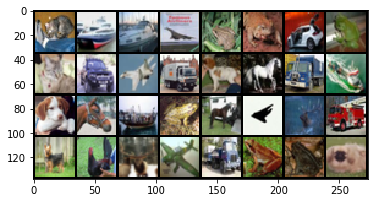

In [40]:
imshow(torchvision.utils.make_grid(images))

In [45]:
correct = 0
total = 0
with torch.no_grad():
    for (data, target) in testloader:
        images, labels = data.to(device), target.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 68 %


In [47]:
torch.save(net.state_dict(),"cifar10.pt")

In [11]:
model = Net()
model

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)

In [12]:
state_dict = torch.load("cifar10.pt")
model.load_state_dict(state_dict)
dummy_input  = torch.rand(1, 3, 32, 32)
torch.onnx.export(model, dummy_input, "torch_cifar10.onnx")